In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns = 200

In [3]:
df = pd.read_csv('../datasets/coaster_db.csv')  # df means DataFrame, we use pandas to read csv files

In [4]:
df.shape  #  row-column size of the dataset  

(1087, 56)

In [5]:
df.head(3)  # head of the dataset (default shows first 5 value) df.head(x) means show first x value

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.580,-81.570,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [6]:
df.columns # column names

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df.dtypes # types of columns

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [8]:
df.describe() # some statistical things

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [9]:
# df.drop(['Duration'], axis = 1)     dropping the columns. axis = 1 means just drop the columns not the row
# df = df.drop(['Duration'], axis = 1).copy()  drop the column then declare our new df

In [10]:

# choosing columns that we need to work with
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()



In [11]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean']) # changing columns' date type. check with df.dtypes

In [12]:
# Rename our columns
df = df.rename(columns={'opening_date_clean':'opening_date',                   
                   'Inversions_clean':'inversions',
                   'Gforce_clean':'Gforce'})

In [13]:
df.isna().sum() # df.isna() (isna=isnone) to find missing values missing values, sum() how many missing values

coaster_name         0
Location             0
Status             213
Manufacturer        59
year_introduced      0
latitude           275
longitude          275
Type_Main            0
opening_date       250
speed_mph          150
height_ft          916
inversions           0
Gforce             725
dtype: int64

In [14]:
#df.loc[df.duplicated()] # locate duplicated values
df.loc[df.duplicated(subset = ['coaster_name'])]  # to find dublicated values in a subset column. 

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date,speed_mph,height_ft,inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [15]:
df.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date,speed_mph,height_ft,inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [16]:
df = df.loc[~df.duplicated(subset = ['coaster_name', 'Location', 'opening_date'])] \
    .reset_index(drop=True) \
    .copy() 
    # with \ we can split our one line code to other lines but dont forget to use intend in the new line
    # \ called line continuation
# find the NOT(~) duplicated dates in given subsets, locate them, reset their index with dropping old index 
df.shape

(990, 13)

In [17]:
df['year_introduced'].value_counts()

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

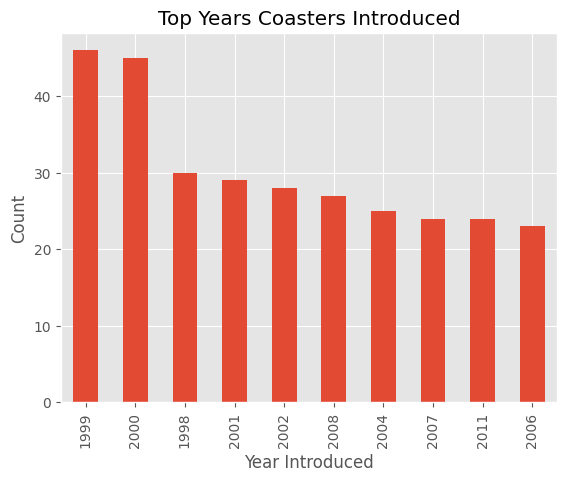

In [18]:
ax = df['year_introduced'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top Years Coasters Introduced')    # if u add h to the kind it will be horizantal. bar, barh 
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'speed mph')

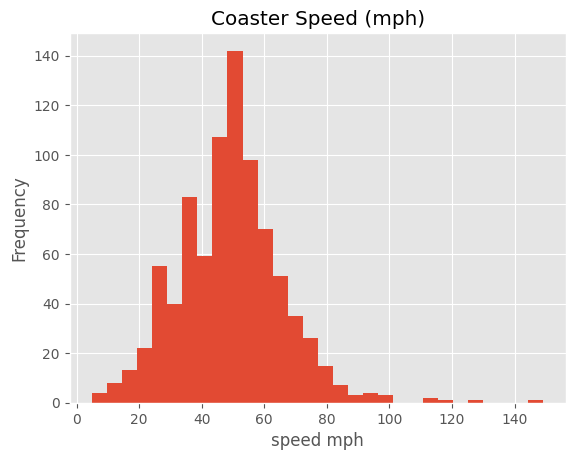

In [19]:
ax = df['speed_mph'].plot(kind = 'hist',
                          bins = 30, 
                          title = 'Coaster Speed (mph)') 
ax.set_xlabel('speed mph')
# histogram

Text(0.5, 0, 'speed mph')

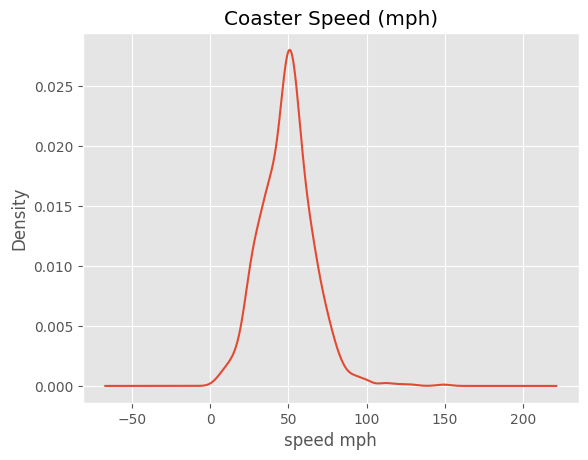

In [20]:
ax = df['speed_mph'].plot(kind = 'kde',
                          title = 'Coaster Speed (mph)') 
ax.set_xlabel('speed mph')
# kernel density estimation KDE

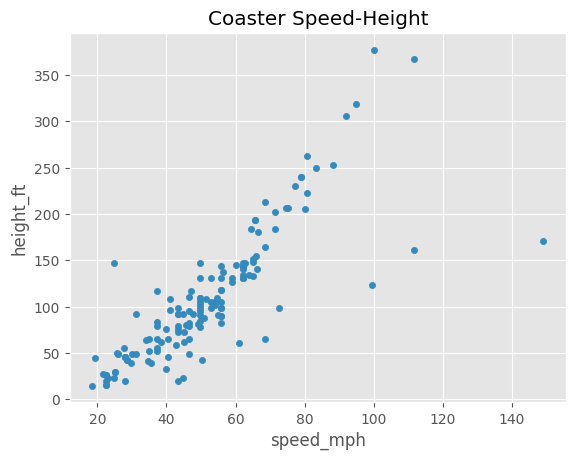

In [21]:
df.plot(kind = 'scatter',
        x = 'speed_mph',
        y = 'height_ft',
        title = 'Coaster Speed-Height')
plt.show()

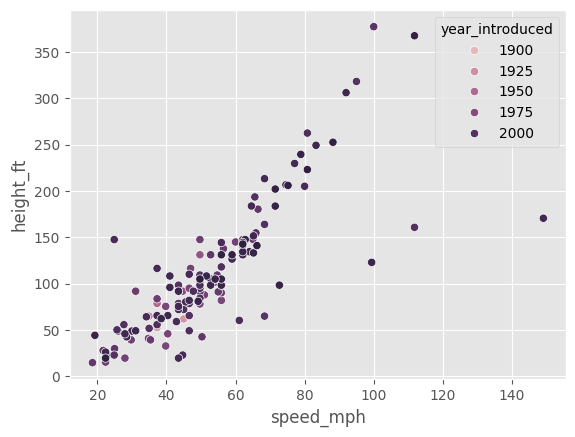

In [22]:
sns.scatterplot(x = 'speed_mph',
                y = 'height_ft',
                hue = 'year_introduced',
                data = df)
plt.show()

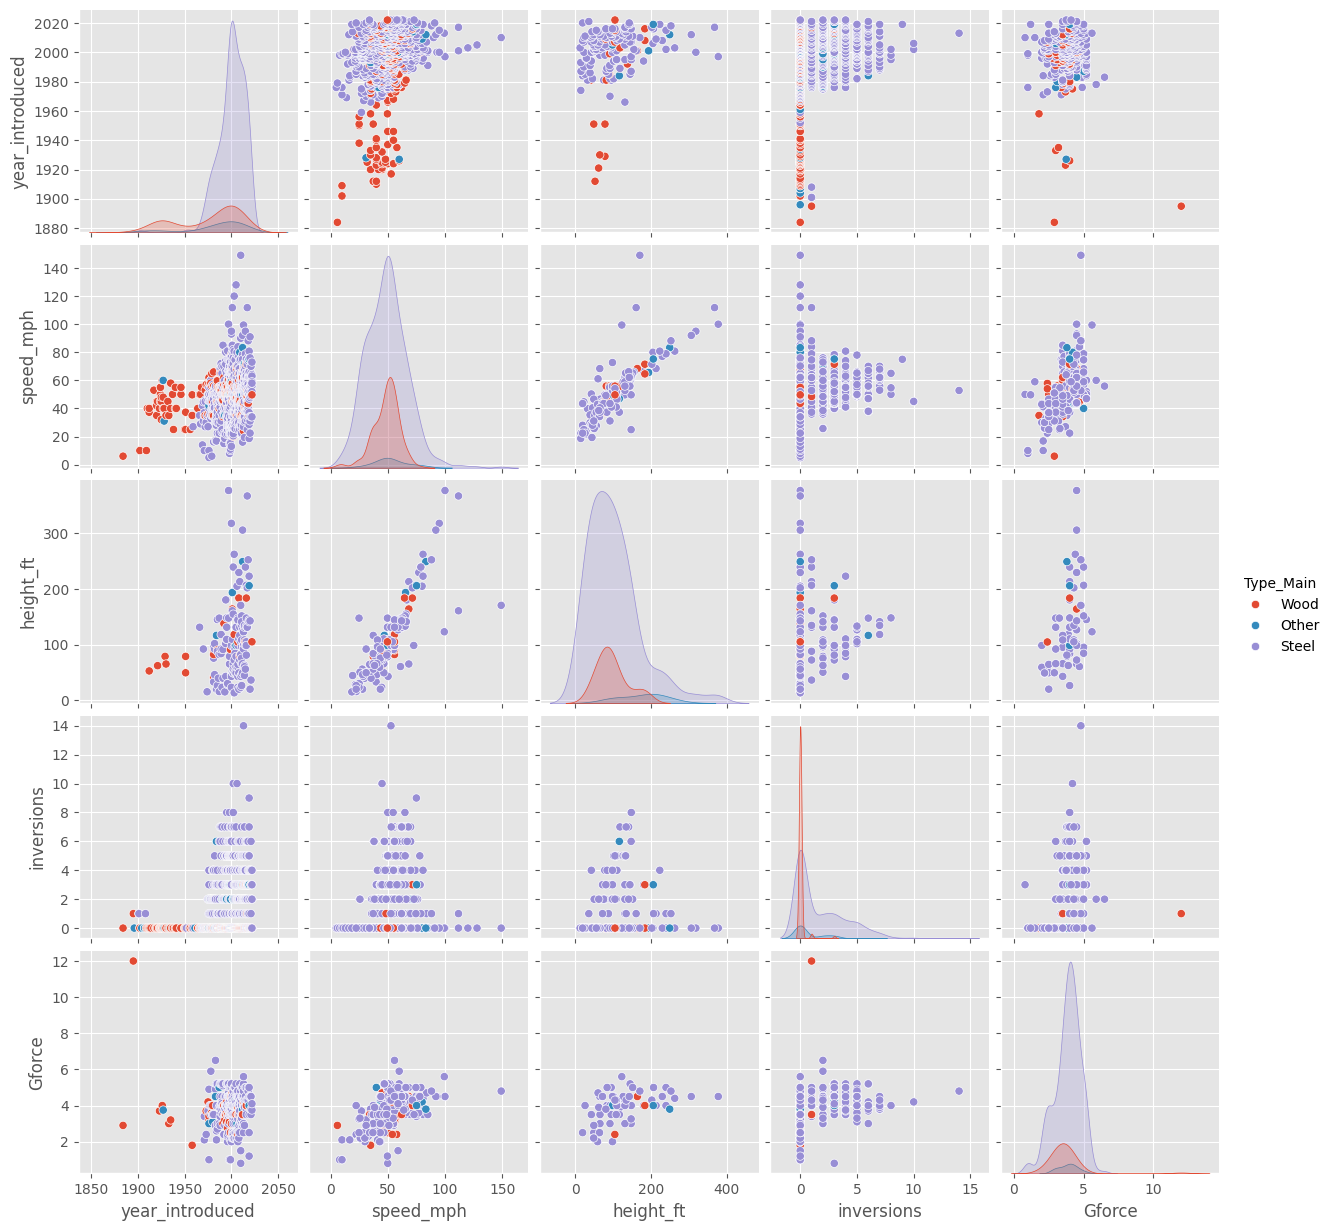

In [23]:
sns.pairplot(df,
             vars=['year_introduced','speed_mph',
                   'height_ft','inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [24]:
df_corr = df[['year_introduced','speed_mph',
                   'height_ft','inversions','Gforce']].dropna().corr()

<Axes: >

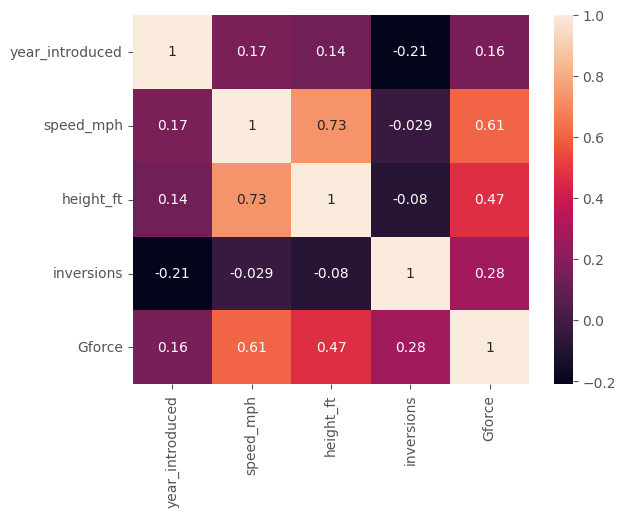

In [25]:
sns.heatmap(df_corr, annot = True) # annot = True means add annotations

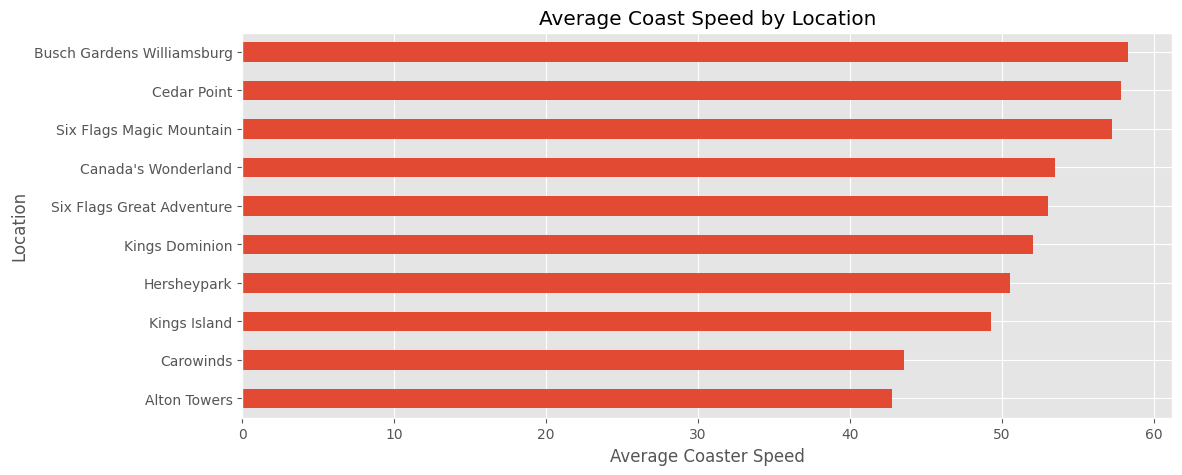

In [26]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()